In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#overview of the data

data=pd.read_csv('homicide.csv')
data.head(5)

,"Country (or dependent territory, subnational area, etc.)",Region,Subregion,Rate,Count,Yearlisted,Source
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Burundi,Africa,Eastern Africa,6.02,635,2016.0,CTS/SDG
2,Comoros,Africa,Eastern Africa,7.70,60,2015.0,WHO Estimate
3,Djibouti,Africa,Eastern Africa,6.48,60,2015.0,WHO Estimate
4,Eritrea,Africa,Eastern Africa,8.04,390,2015.0,WHO Estimate


In [42]:
data=data.rename(columns={'Country (or dependent territory, subnational area, etc.)':'Country'}) 
                

In [43]:
data=data.drop(['Yearlisted', 'Source'], axis=1)

In [44]:
data.head()

,Country,Region,Subregion,Rate,Count
0,NaN,NaN,NaN,NaN,NaN
1,Burundi,Africa,Eastern Africa,6.02,635
2,Comoros,Africa,Eastern Africa,7.70,60
3,Djibouti,Africa,Eastern Africa,6.48,60
4,Eritrea,Africa,Eastern Africa,8.04,390


In [45]:
#deleting elements with null values

data=data.dropna()

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 230
Data columns (total 5 columns):
Country      230 non-null object
Region       230 non-null object
Subregion    230 non-null object
Rate         230 non-null float64
Count        230 non-null object
dtypes: float64(1), object(4)
memory usage: 10.8+ KB


In [47]:
data.head()

,Country,Region,Subregion,Rate,Count
1,Burundi,Africa,Eastern Africa,6.02,635
2,Comoros,Africa,Eastern Africa,7.70,60
3,Djibouti,Africa,Eastern Africa,6.48,60
4,Eritrea,Africa,Eastern Africa,8.04,390
5,Ethiopia,Africa,Eastern Africa,7.56,"7,552"


In [48]:
#converting from comma separated numbers to numbers without commas

for i in range(0,230):
    data['Count'].iloc[i]=float(data['Count'].iloc[i].replace(',',''))


In [49]:
#converting to numeric

data["Count"] = data["Count"].apply(pd.to_numeric, errors='coerce').astype('float64')


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 230
Data columns (total 5 columns):
Country      230 non-null object
Region       230 non-null object
Subregion    230 non-null object
Rate         230 non-null float64
Count        230 non-null float64
dtypes: float64(2), object(3)
memory usage: 10.8+ KB


In [51]:
data.corr()

,Rate,Count
Rate,1.00000,0.26783
Count,0.26783,1.00000


In [52]:
data.head()

,Country,Region,Subregion,Rate,Count
1,Burundi,Africa,Eastern Africa,6.02,635.0
2,Comoros,Africa,Eastern Africa,7.70,60.0
3,Djibouti,Africa,Eastern Africa,6.48,60.0
4,Eritrea,Africa,Eastern Africa,8.04,390.0
5,Ethiopia,Africa,Eastern Africa,7.56,7552.0


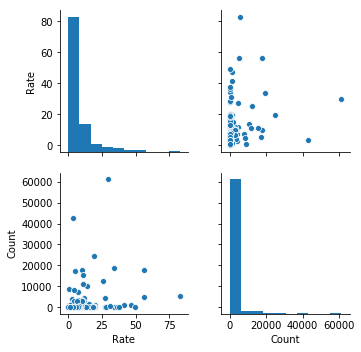

In [53]:
#pairplot

sns.pairplot(data)

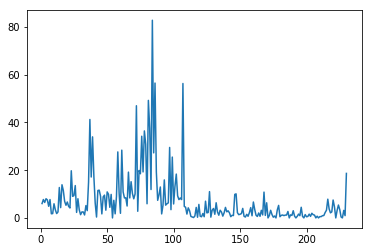

In [54]:
#lineplot

sns.lineplot(data=data['Rate'])

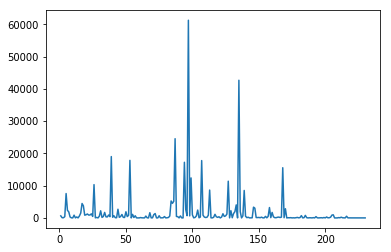

In [55]:
sns.lineplot(data=data['Count'])

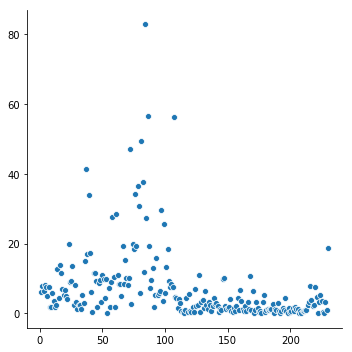

In [56]:
#scatterplot

sns.relplot( data=data['Rate'])

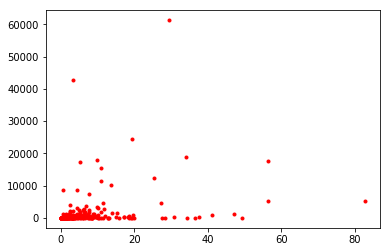

In [57]:
#scatterplot

plt.scatter(x=data['Rate'], y=data['Count'], color='r',marker='.')